In [2]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0)


def show_tensor_images(image_tensor,num_images=25,size=(1,28,28)):
    image_tensor=(image_tensor+1)/2
    image_unflat=image_tensor.detach().cpu()
    image_grid= make_grid(image_unflat[:num_images],nrow=5)
    plt.imshow(image_grid.permute(1,2,0).squeeze())
    plt.show()
    

In [3]:
class Generator(nn.Module):
    def __init__(self,z_dim=10,im_chan=1,hidden_dim=64):
        super(Generator,self).__init__()
        self.z_dim=z_dim
        self.gen=nn.Sequential(
        self.make_gen_block(z_dim,hidden_dim*4),
        self.make_gen_block(hidden_dim * 4,hidden_dim * 2,kernel_size=4,stride=1),
        self.make_gen_block(hidden_dim * 2,hidden_dim),
        self.make_gen_block(hidden_dim,im_chan,kernel_size=4,final_layer=True),
        )
        
    def make_gen_block(self, input_channels,output_channels,kernel_size=3,stride=2,final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.ConvTranspose2d(input_channels,output_channels,kernel_size,stride),
                nn.BatchNorm2d(output_channels),
                nn.ReLU(inplace=True),
                
            )
        else:
            return nn.Sequential(
            nn.ConvTranspose2d(input_channels,output_channels,kernel_size,stride),
            nn.Tanh()
            
            )
    def unsqueeze_noise(self,noise):
        return noise.view(len(noise),self.z_dim,1,1)
    
    def forward(self,noise):
        x=self.unsqueeze_noise(noise)
        return self.gen(x)
    
    
    
    
def get_noise(n_sample,z_dim,device='cpu'):
    return torch.randn(n_sample,z_dim,device=device)
    

In [3]:
class Discriminator(nn.Module):
    def __init__(self,im_chan=1,hidden_dim=16):
        super(Discriminator,self).__init__()
        self.disc=nn.Sequential(
        self.make_disc_block(im_chan,hidden_dim),
        self.make_disc_block(hidden_dim,hidden_dim*2),
        self.make_disc_block(hidden_dim*2,1,final_layer=True),
        )
    
    def make_disc_block(self,input_channels,output_channels,kernel_size=4,stride=2,final_layer=False):
        if not final_layer:
            return nn.Sequential(
                nn.Conv2d(input_channels,output_channels,kernel_size,stride),
                nn.BatchNorm2d(output_channels),
                nn.LeakyReLU(0.2)
            )
        else:
            return nn.Sequential(
            nn.Conv2d(input_channels,output_channels,kernel_size,stride),
#             nn.LeakyReLU(0.2)
        )
        
    def forward(self,image):
        disc_pred = self.disc(image)
        return disc_pred.view(len(disc_pred),-1)

In [4]:
criterion=nn.BCEWithLogitsLoss()
z_dim=64
display_step=500
batch_size=128
lr=0.0002

beta_1=0.5
beta_2=0.999
device='cuda'

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5)),
])


dataloader=DataLoader(
MNIST('.',download=False,transform=transform),
batch_size=batch_size,
shuffle=True
)


In [5]:
gen=Generator(z_dim).to(device)
gen_opt=torch.optim.Adam(gen.parameters(),lr=lr,betas=(beta_1,beta_2))
disc=Discriminator().to(device)
disc_opt=torch.optim.Adam(disc.parameters(),lr=lr,betas=(beta_1,beta_2))
def weights_init(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)
gen = gen.apply(weights_init)
disc = disc.apply(weights_init)


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 500: Generator loss: 0.8973641558885581, discriminator loss: 0.5454259906411166


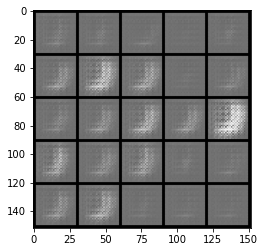

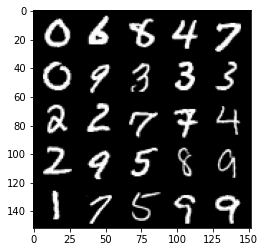

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1000: Generator loss: 1.6769869065880767, discriminator loss: 0.34329418069124257


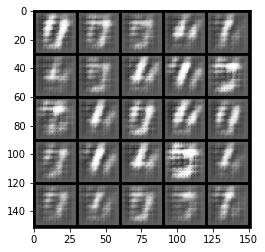

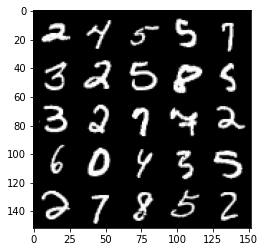

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1500: Generator loss: 1.3973301029205318, discriminator loss: 0.4394838013947005


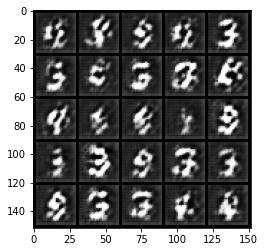

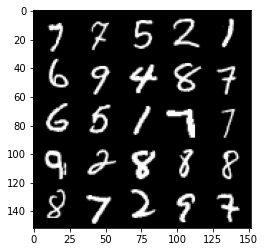

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2000: Generator loss: 1.0542261202931411, discriminator loss: 0.5642945040464402


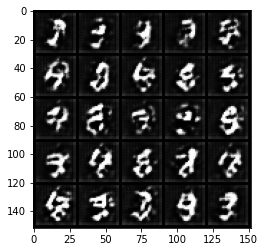

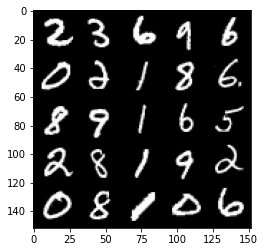

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2500: Generator loss: 0.9352750763893133, discriminator loss: 0.5873083446025847


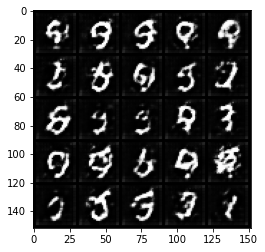

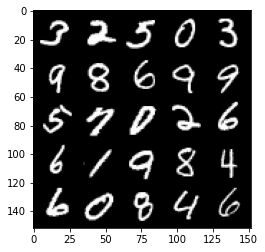

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3000: Generator loss: 0.8699475073218339, discriminator loss: 0.6187389346361161


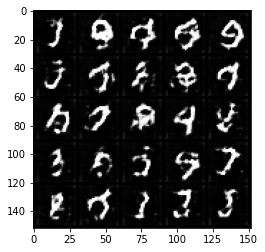

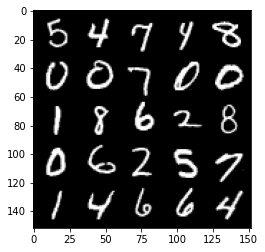

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3500: Generator loss: 0.7980688294768333, discriminator loss: 0.6504465448856355


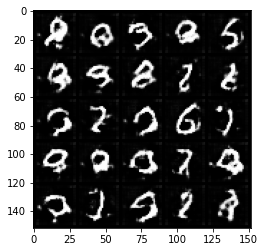

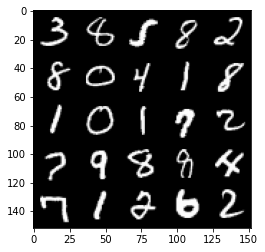

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4000: Generator loss: 0.7624797239303588, discriminator loss: 0.6701678876876838


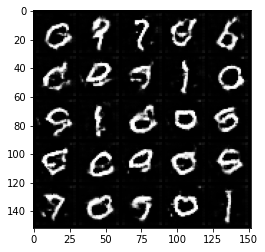

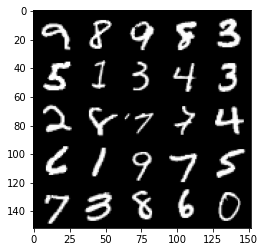

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4500: Generator loss: 0.7537534242868423, discriminator loss: 0.6746685868501656


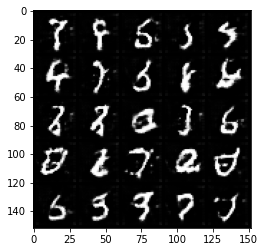

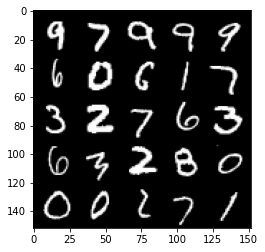

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5000: Generator loss: 0.7589773055911058, discriminator loss: 0.6751330678462985


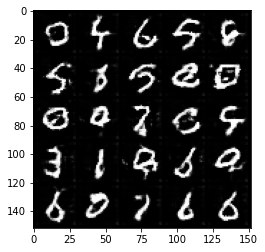

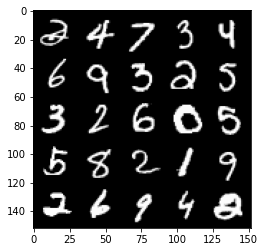

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5500: Generator loss: 0.7519325664639468, discriminator loss: 0.6774255058765417


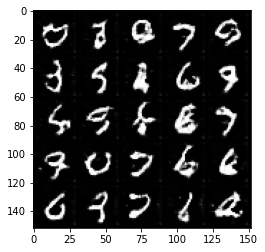

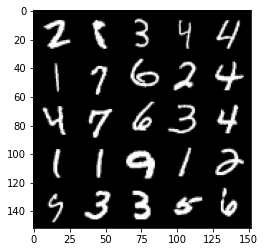

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6000: Generator loss: 0.7403518187403679, discriminator loss: 0.6808405927419656


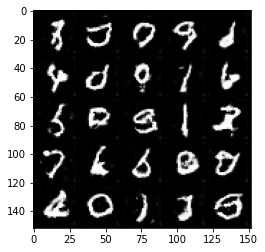

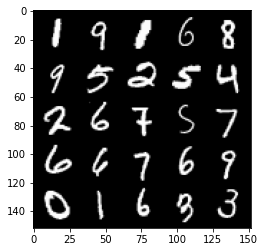

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6500: Generator loss: 0.7323766182065014, discriminator loss: 0.6866194345951079


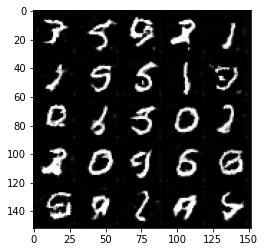

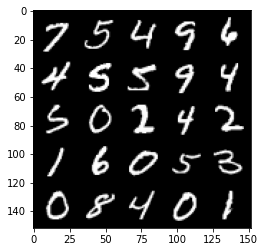

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7000: Generator loss: 0.7290236308574685, discriminator loss: 0.6892641955614093


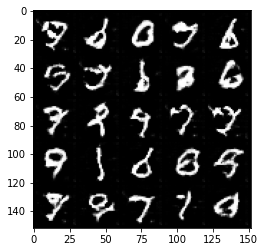

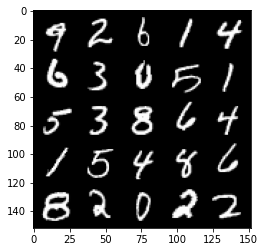

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7500: Generator loss: 0.7274584237337113, discriminator loss: 0.6905035387277603


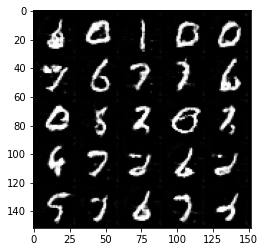

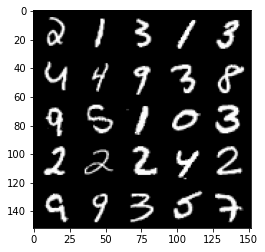

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8000: Generator loss: 0.725382679522038, discriminator loss: 0.6924181860685346


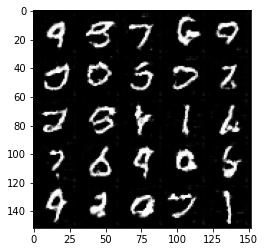

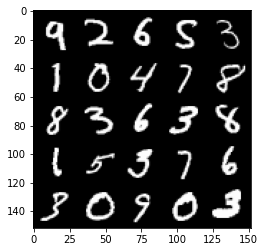

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8500: Generator loss: 0.7190608592033383, discriminator loss: 0.6931800055503846


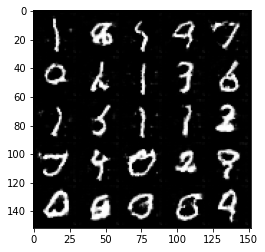

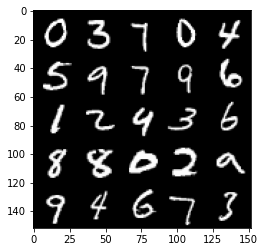

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9000: Generator loss: 0.7168378162980067, discriminator loss: 0.6947621110677714


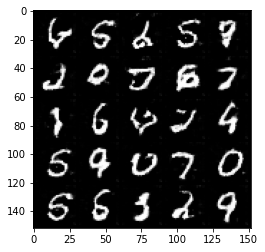

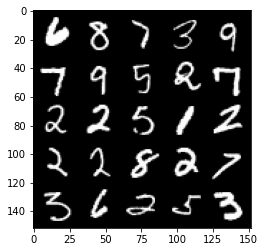

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9500: Generator loss: 0.715974720478058, discriminator loss: 0.6953327962160117


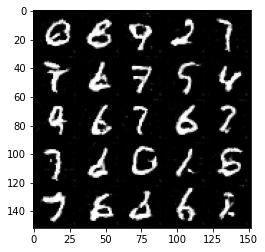

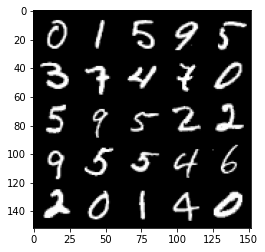

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10000: Generator loss: 0.712011921644211, discriminator loss: 0.6954521839618683


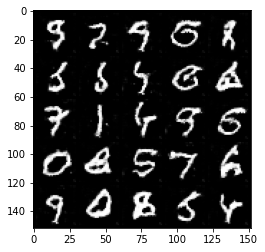

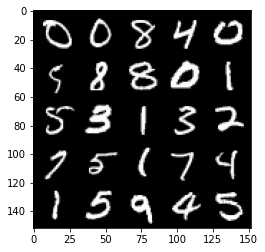

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10500: Generator loss: 0.7117563104033472, discriminator loss: 0.6949177964925766


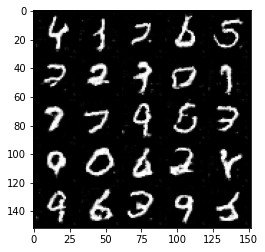

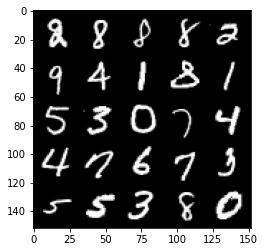

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11000: Generator loss: 0.7125575799345969, discriminator loss: 0.6953668466806414


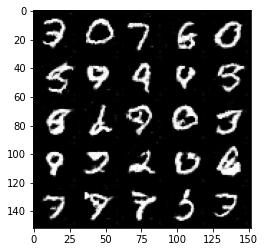

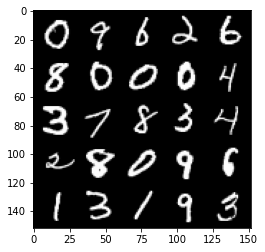

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11500: Generator loss: 0.7114193594455719, discriminator loss: 0.695579335212707


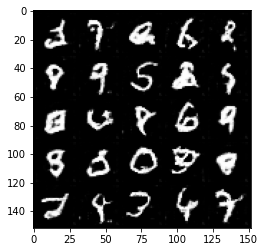

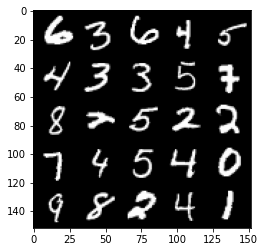

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12000: Generator loss: 0.7095280024409292, discriminator loss: 0.6954748238325122


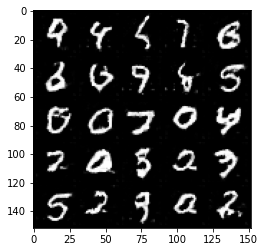

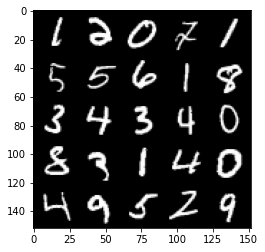

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12500: Generator loss: 0.7073125575184827, discriminator loss: 0.6956611905097956


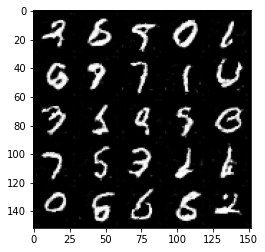

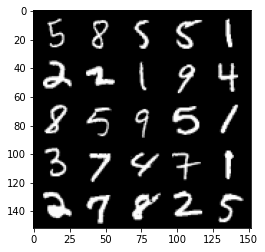

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13000: Generator loss: 0.7060435263514515, discriminator loss: 0.6968958501815797


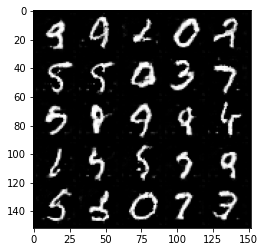

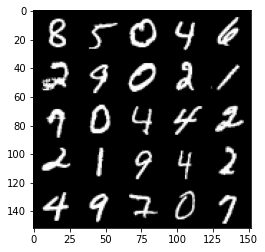

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13500: Generator loss: 0.7058180170059201, discriminator loss: 0.6962869322299957


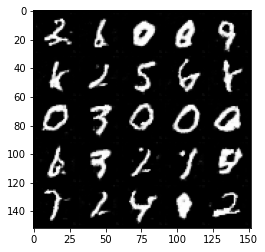

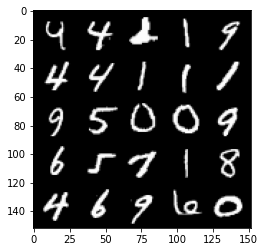

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14000: Generator loss: 0.7051138912439351, discriminator loss: 0.6957876553535466


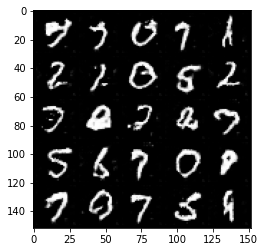

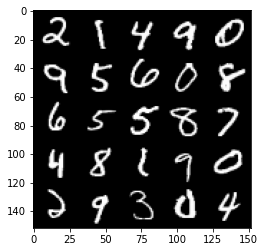

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14500: Generator loss: 0.705358036875725, discriminator loss: 0.6961362679004669


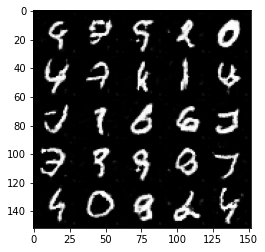

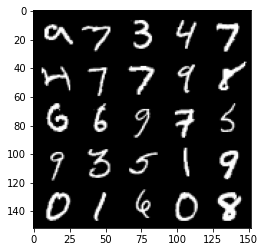

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15000: Generator loss: 0.7040654267072683, discriminator loss: 0.6962432842254642


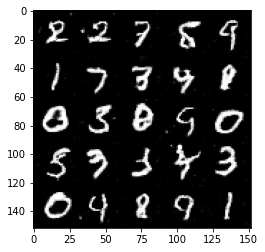

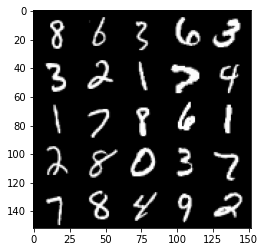

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15500: Generator loss: 0.7026765438318255, discriminator loss: 0.6963497848510735


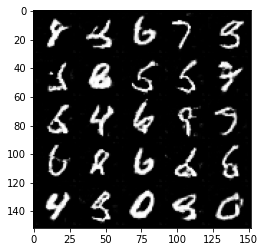

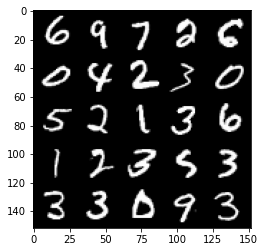

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16000: Generator loss: 0.7021249179840091, discriminator loss: 0.6960301470756529


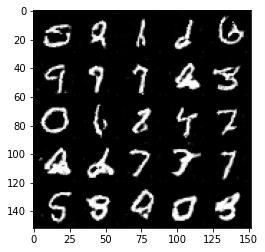

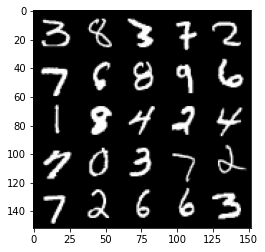

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16500: Generator loss: 0.700971832752227, discriminator loss: 0.6959796342849733


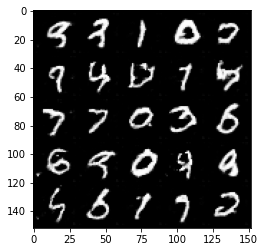

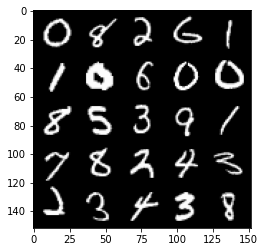

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17000: Generator loss: 0.701435519099236, discriminator loss: 0.695789861559868


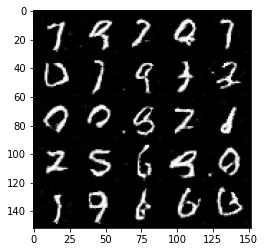

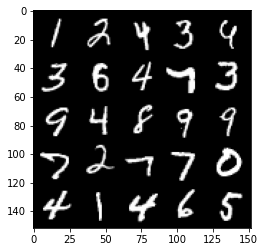

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17500: Generator loss: 0.7003589025735851, discriminator loss: 0.6962082425355919


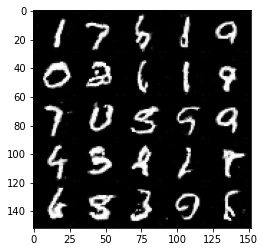

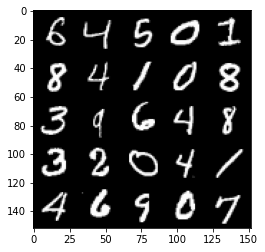

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18000: Generator loss: 0.6993684866428379, discriminator loss: 0.6954929393529896


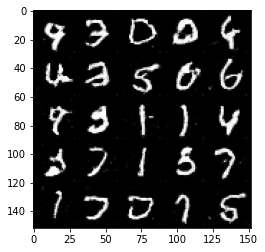

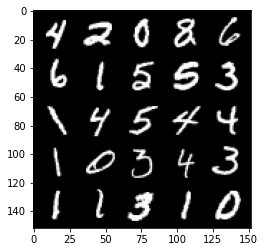

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18500: Generator loss: 0.6988271893262862, discriminator loss: 0.6957676218748091


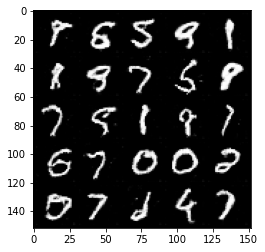

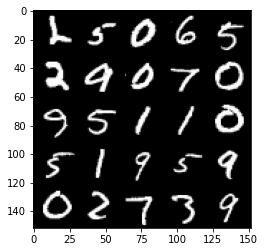

  0%|          | 0/469 [00:00<?, ?it/s]

Step 19000: Generator loss: 0.699411222577095, discriminator loss: 0.6953228744268423


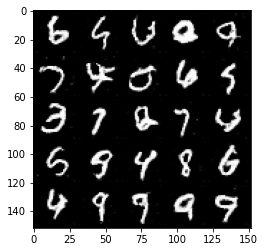

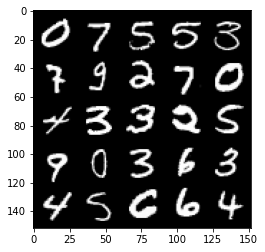

  0%|          | 0/469 [00:00<?, ?it/s]

Step 19500: Generator loss: 0.6989382880926134, discriminator loss: 0.6953803158998493


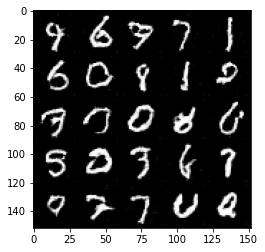

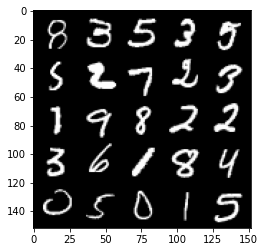

  0%|          | 0/469 [00:00<?, ?it/s]

Step 20000: Generator loss: 0.6996602388620377, discriminator loss: 0.6955986812114712


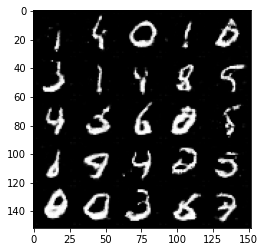

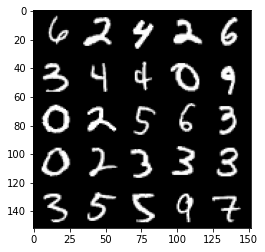

  0%|          | 0/469 [00:00<?, ?it/s]

Step 20500: Generator loss: 0.6977844815254214, discriminator loss: 0.6953143800497058


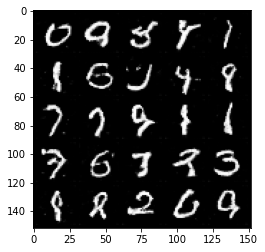

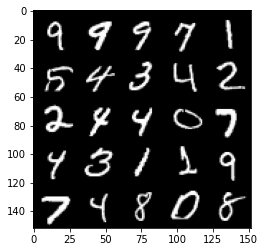

  0%|          | 0/469 [00:00<?, ?it/s]

Step 21000: Generator loss: 0.6978157017230979, discriminator loss: 0.6951405246257778


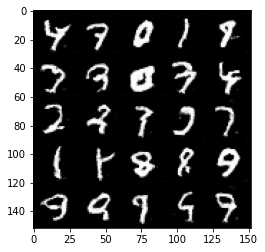

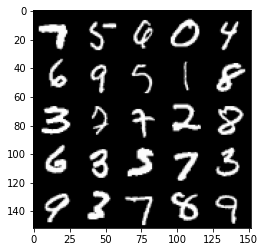

  0%|          | 0/469 [00:00<?, ?it/s]

Step 21500: Generator loss: 0.6967299451828001, discriminator loss: 0.6946615067720416


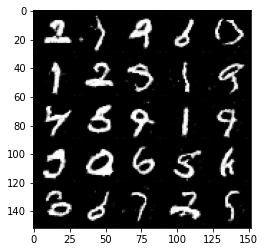

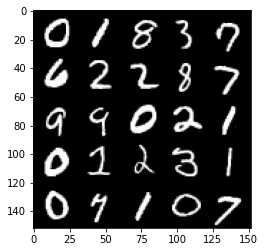

  0%|          | 0/469 [00:00<?, ?it/s]

Step 22000: Generator loss: 0.6982297564744947, discriminator loss: 0.6948133518695817


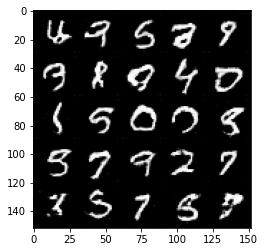

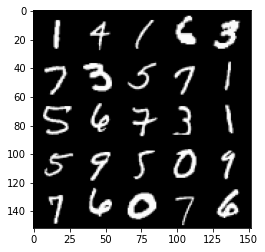

  0%|          | 0/469 [00:00<?, ?it/s]

Step 22500: Generator loss: 0.6973222113847737, discriminator loss: 0.6948089084625245


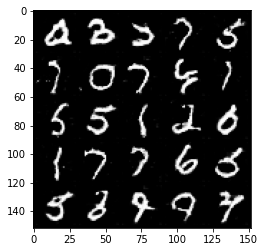

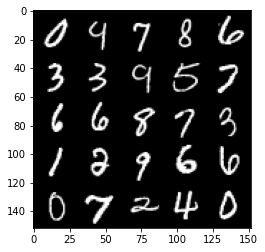

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 23000: Generator loss: 0.6975577931404113, discriminator loss: 0.6946478188037873


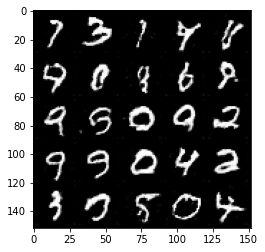

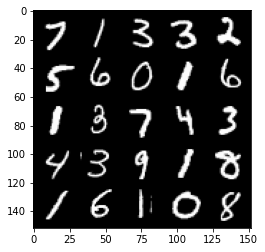

In [6]:
n_epochs=50
cur_step=0
mean_generator_loss=0
mean_discriminator_loss=0

for epoch in range(n_epochs):
    for real, _ in tqdm(dataloader):
        cur_batch_size=len(real)
        real=real.to(device)
        
        disc_opt.zero_grad()
        fake_noise=get_noise(cur_batch_size,z_dim,device=device)
        fake=gen(fake_noise)
        disc_fake_pred=disc(fake.detach())
        disc_fake_loss=criterion(disc_fake_pred,torch.zeros_like(disc_fake_pred))
        disc_real_pred=disc(real)
        disc_real_loss=criterion(disc_real_pred,torch.ones_like(disc_real_pred))
        disc_loss =(disc_fake_loss + disc_real_loss)/2
        
        
        mean_discriminator_loss+=disc_loss.item()/display_step
        disc_loss.backward(retain_graph=True)
        disc_opt.step()
        
        
        gen_opt.zero_grad()
        fake_noise_2=get_noise(cur_batch_size,z_dim,device=device)
        fake_2=gen(fake_noise_2)
        disc_fake_pred=disc(fake_2)
        gen_loss=criterion(disc_fake_pred,torch.ones_like(disc_fake_pred))
        gen_loss.backward()
        gen_opt.step()
        
        mean_generator_loss+=gen_loss.item()/display_step
        if cur_step % display_step == 0 and cur_step > 0:
            print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            show_tensor_images(fake)
            show_tensor_images(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
        cur_step += 1
    
        
        